<h2 align="center"><b>EDM Challenge - Kelompok 22</b></h2>

<table align="center">
  <thead>
    <tr>
      <th>Nama Anggota</th>
      <th>NIM</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Prisa Ayudia Ningtiyas</td>
      <td>102022300016</td>
    </tr>
    <tr>
      <td>Nazwa Yunia Santosa</td>
      <td>102022300059</td>
    </tr>
    <tr>
      <td>Sabrina Adinda Willyasarie</td>
      <td>102022300182</td>
    </tr>
  </tbody>
</table>

### **📊 Import Libraries**

Pada bagian ini, berbagai library penting diimpor. Library seperti pandas dan numpy digunakan untuk manipulasi dan analisis data. matplotlib dan seaborn digunakan untuk membuat visualisasi seperti boxplot dan heatmap. Dari scikit-learn, beberapa modul digunakan untuk preprocessing (seperti encoding dan scaling), pembagian data, pemodelan (Random Forest, Naive Bayes, Logistic Regression), dan evaluasi model (ROC, AUC).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

### **📂 Load Dataset**

Dataset dimuat dari file CSV yang berisi data mengenai food waste berdasarkan negara. Ini adalah langkah awal untuk mempersiapkan data sebelum dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("Food Waste data and research - by country.csv")


### **📄 Data Understanding**

Menampilkan struktur data, termasuk jumlah baris, kolom, jenis data setiap kolom, serta jumlah nilai yang tidak null. Ini penting untuk memahami struktur dasar dataset.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

**❗ Deteksi Duplikasi**

Digunakan untuk menghitung jumlah baris yang duplikat. Baris duplikat dapat menyebabkan distorsi dalam analisis dan pemodelan, sehingga perlu dihapus jika ada.

In [4]:
df.duplicated().sum()

np.int64(0)

**🔍 Deteksi Nilai Kosong**

Digunakan untuk menghitung jumlah nilai kosong (null) di setiap kolom. Tahap ini penting untuk menentukan apakah perlu dilakukan penanganan data hilang seperti imputasi atau penghapusan.

In [5]:
df.isnull().sum()

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

**📊 Statistik Deskriptif**

Menampilkan ringkasan statistik deskriptif dari kolom numerik seperti rata-rata, standar deviasi, nilai maksimum, minimum, dll. Ini membantu memahami distribusi nilai.

In [6]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


### **📦 Boxplot**

Boxplot digunakan untuk mendeteksi outlier pada fitur numerik. Dengan visualisasi ini, dapat dilihat nilai-nilai ekstrem di masing-masing fitur yang mungkin perlu penanganan lebih lanjut.

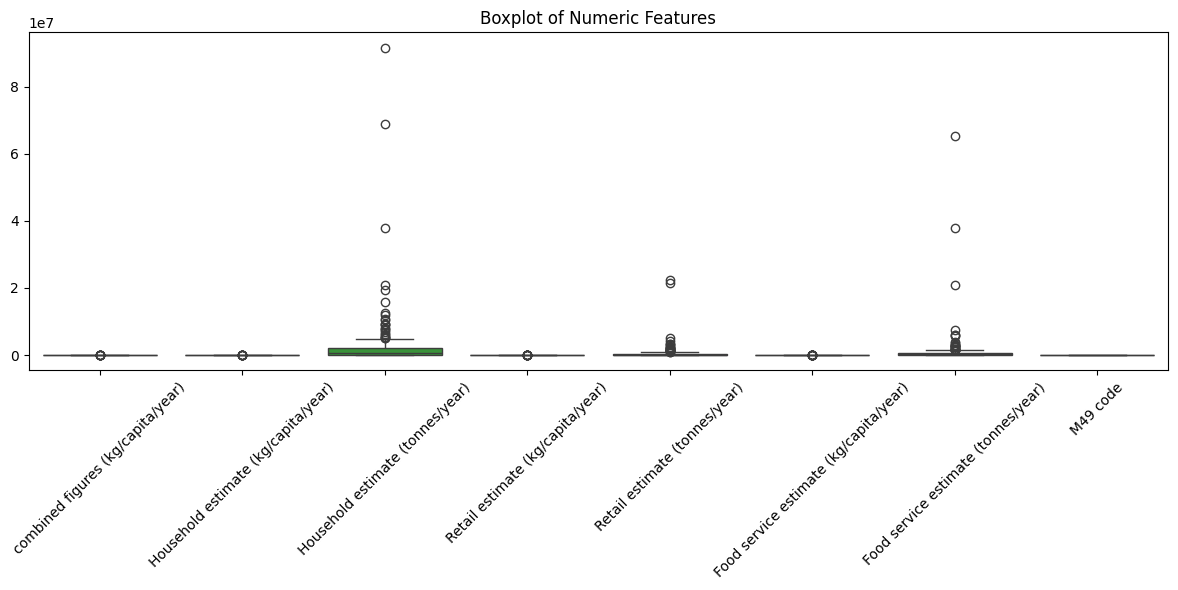

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.tight_layout()
plt.show()

### **🔁 Encoding Data Kategorikal**

Label encoding dilakukan pada kolom kategorikal: Confidence in estimate dan Region. Ini penting karena model ML hanya dapat menerima data numerik.

In [8]:
df_encoded = df.copy()
le_conf = LabelEncoder()
le_region = LabelEncoder()
df_encoded["Confidence in estimate"] = le_conf.fit_transform(df["Confidence in estimate"])
df_encoded["Region"] = le_region.fit_transform(df["Region"])

**📋 Menampilkan Frekuensi Kategori**

In [9]:
print(df['Confidence in estimate'].value_counts())

Confidence in estimate
Very Low Confidence    130
Low Confidence          61
Medium Confidence       13
High Confidence         10
Name: count, dtype: int64


In [10]:
print(df['Region'].value_counts())

Region
Sub-Saharan Africa                 48
Latin America and the Caribbean    42
Western Asia                       18
Southern Europe                    15
Northern Europe                    12
South-eastern Asia                 11
Eastern Europe                     10
Southern Asia                       9
Western Europe                      9
Eastern Asia                        7
Micronesia                          7
Northern Africa                     6
Melanesia                           5
Central Asia                        5
Northern America                    4
Polynesia                           4
Australia and New Zealand           2
Name: count, dtype: int64


### **🧹 Drop Kolom Tidak Relevan**

Kolom-kolom yang tidak diperlukan dalam pelatihan model dihapus karena tidak memberikan kontribusi signifikan, atau memiliki informasi yang tidak dapat diproses oleh model.

In [11]:
df_encoded = df_encoded.drop(columns=["Country", "Source", "M49 code"])

### **🔥 Korelasi Heatmap**

Heatmap digunakan untuk melihat korelasi antar fitur. Ini dapat membantu dalam feature selection, yaitu memilih fitur yang relevan dan tidak saling berkorelasi tinggi.

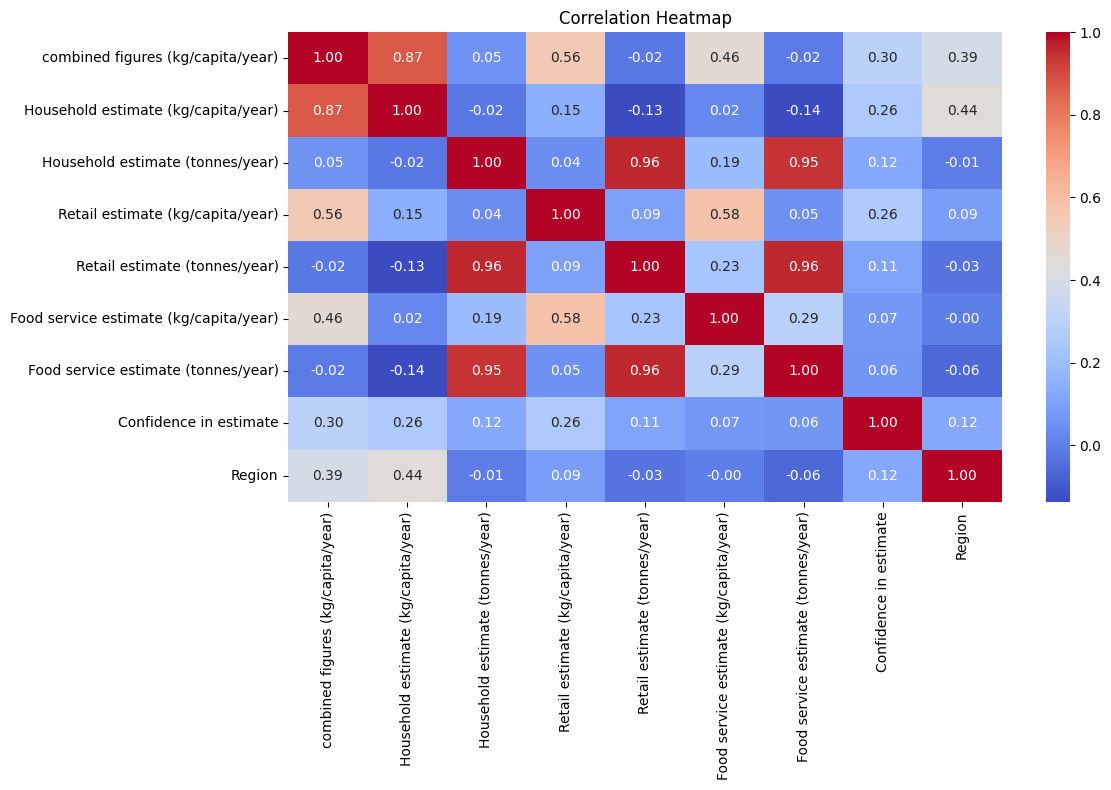

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### **📈 Fungsi Visualisasi ROC Curve**

Fungsi ini digunakan untuk menggambarkan kurva ROC untuk masing-masing kelas pada prediksi multi-kelas. ROC digunakan untuk mengevaluasi kinerja model klasifikasi dalam hal trade-off antara True Positive Rate dan False Positive Rate.

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, yprob, le, title):
    plt.figure(figsize=(8, 6))
    # Access classes using .classes_
    for i in range(len(le.classes_)):
        # Ensure y_prob is correctly sliced for the current class
        # Use yprob consistently
        fpr, tpr, _ = roc_curve(y_true == i, yprob[:, i])
        # Calculate AUC for the current class (one-vs-rest)
        # Use yprob consistently
        auc = roc_auc_score(y_true == i, yprob[:, i])
        # Use le.classes_[i] to get the original class label for the legend
        plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

In [14]:
# ========== 4. Pisahkan Fitur dan Target ==========
X = df_encoded.drop(columns=["Confidence in estimate"])
y = df_encoded["Confidence in estimate"]

# ========== 5. Split Data ==========
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ========== 6. Scaling ==========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========== 7. Random Forest ==========
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# ========== 8. Naive Bayes ==========
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_preds = nb.predict(X_test_scaled)

# ========== 9. Logistic Regression ==========
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)


In [15]:
from sklearn.metrics import classification_report

print("=== Classification Report: Random Forest ===")
print(classification_report(y_test, rf.predict(X_test), zero_division=0))

=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        12
           2       0.75      1.00      0.86         3
           3       0.96      1.00      0.98        26

    accuracy                           0.95        43
   macro avg       0.68      0.75      0.71        43
weighted avg       0.91      0.95      0.93        43



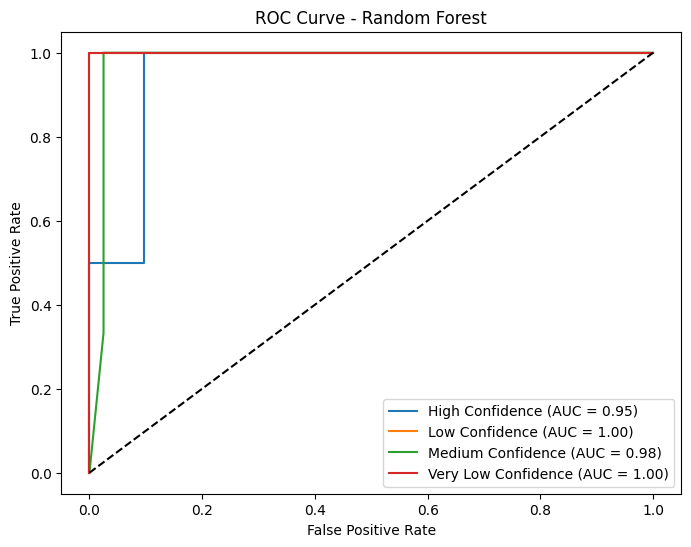

In [16]:
rf_probs = rf.predict_proba(X_test)
plot_roc_curve(y_test, rf_probs, le_conf, 'ROC Curve - Random Forest')

=== Classification Report: Naive Bayes ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        12
           2       0.50      0.67      0.57         3
           3       1.00      0.96      0.98        26

    accuracy                           0.91        43
   macro avg       0.62      0.66      0.64        43
weighted avg       0.92      0.91      0.91        43



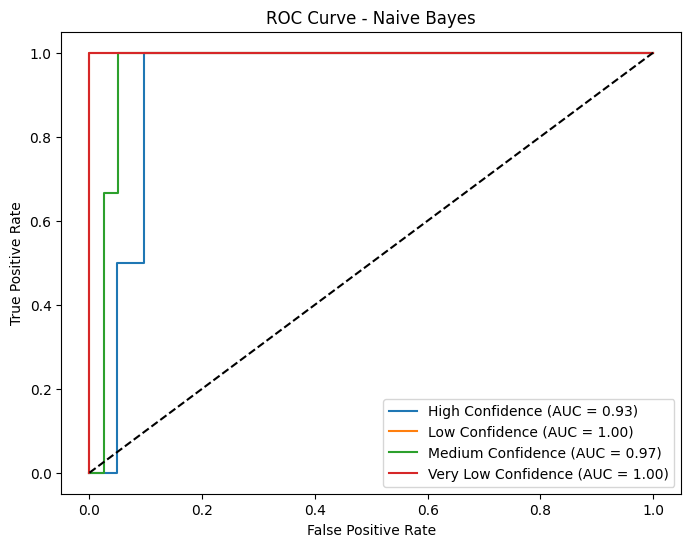

In [17]:
print("=== Classification Report: Naive Bayes ===")
print(classification_report(y_test, nb.predict(X_test_scaled), zero_division=0))

nb_probs = nb.predict_proba(X_test_scaled)
plot_roc_curve(y_test, nb_probs, le_conf, 'ROC Curve - Naive Bayes')



=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.79      0.92      0.85        12
           2       0.00      0.00      0.00         3
           3       0.93      1.00      0.96        26

    accuracy                           0.88        43
   macro avg       0.68      0.60      0.62        43
weighted avg       0.83      0.88      0.85        43



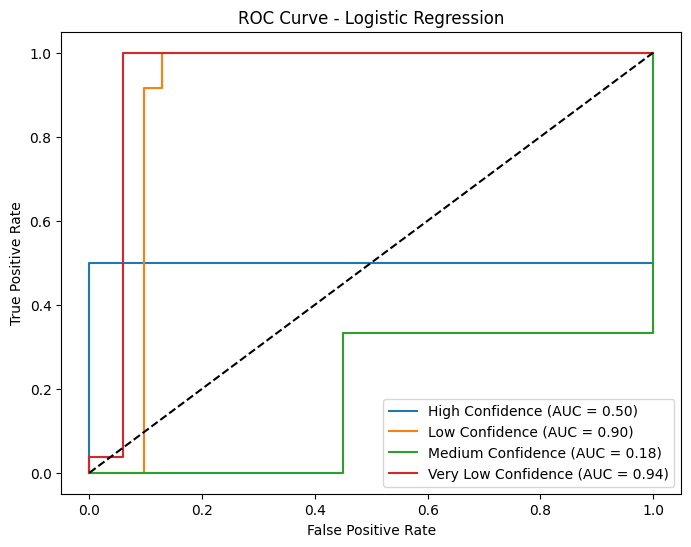

In [18]:
print("=== Classification Report: Logistic Regression ===")
print(classification_report(y_test, lr.predict(X_test_scaled), zero_division=0))

lr_probs = lr.predict_proba(X_test_scaled)
plot_roc_curve(y_test, lr_probs, le_conf, 'ROC Curve - Logistic Regression')

In [19]:
!ngrok config add-authtoken 2wwdJFwINjpCSNa4DknOUB9DfzM_3p6Zi1VWZr323oyzneU41

Authtoken saved to configuration file: /Users/prisaayudianingtiyas/Library/Application Support/ngrok/ngrok.yml


In [20]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# ==================== LOAD DATA ====================
df = pd.read_csv("Food Waste data and research - by country.csv")
df_encoded = df.copy()

# ==================== ENCODING ====================
le_conf = LabelEncoder()
le_region = LabelEncoder()
df_encoded["Confidence in estimate"] = le_conf.fit_transform(df["Confidence in estimate"])
df_encoded["Region"] = le_region.fit_transform(df["Region"])
df_encoded = df_encoded.drop(columns=["Country", "Source", "M49 code"])

# ==================== SPLIT X and y ====================
X = df_encoded.drop(columns=["Confidence in estimate"])
y = df_encoded["Confidence in estimate"]

# ==================== TRAIN MODELS ====================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42).fit(X, y)
# nb = GaussianNB().fit(X_scaled, y)
# lr = LogisticRegression(max_iter=1000).fit(X_scaled, y)

# ==================== STREAMLIT DASHBOARD ====================
st.set_page_config(page_title="Food Waste Dashboard", layout="wide")
st.title("🌍 Food Waste Analysis & Prediction App")

# ==================== SECTION 1: DATA SUMMARY ====================
st.header("📌 Informasi Umum")
col1, col2, col3 = st.columns(3)
col1.metric("Total Negara", len(df))
col2.metric("Rata-rata Waste (kg/capita)", f"{df['combined figures (kg/capita/year)'].mean():.2f}")
col3.metric("Jumlah Region", df['Region'].nunique())

# ==================== SECTION 2: VISUALISASI ====================
st.header("📊 Visualisasi Data")
# with st.expander("Lihat Boxplot & Heatmap"):
#     st.subheader("Boxplot")
#     fig, ax = plt.subplots(figsize=(10, 5))
#     sns.boxplot(data=df_encoded.select_dtypes(include=np.number), ax=ax)
#     st.pyplot(fig)
with st.expander("Lihat Boxplot & Heatmap"):
    st.subheader("Boxplot")
    fig, ax = plt.subplots(figsize=(12, 6))  # bisa diperbesar jika perlu
    sns.boxplot(data=df_encoded.select_dtypes(include=np.number), ax=ax)

    # Putar label sumbu-x agar tidak tumpang tindih
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Atur layout agar tidak terpotong
    fig.tight_layout()

    st.pyplot(fig)

    st.subheader("Heatmap Korelasi")
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=ax2)
    st.pyplot(fig2)

# # ==================== SECTION 3: KLASIFIKASI CONFIDENCE ====================
# st.header("🧠 Prediksi Confidence in Estimate")
# st.write("Masukkan estimasi limbah makanan dari berbagai sektor:")

# house = st.number_input("Household (kg/capita)", 0.0)
# retail = st.number_input("Retail (kg/capita)", 0.0)
# service = st.number_input("Food Service (kg/capita)", 0.0)
# total = house + retail + service

# if st.button("Prediksi Confidence"):
#     # ✅ Buat template input dari baris pertama tapi semua isinya diratakan
#     input_df = X.iloc[0:1].copy()
#     input_df.loc[:, :] = X.mean().values  # pakai nilai rata-rata untuk semua kolom

#     # Timpa nilai berdasarkan input user
#     input_df["Household estimate (kg/capita/year)"] = house
#     input_df["Retail estimate (kg/capita/year)"] = retail
#     input_df["Food service estimate (kg/capita/year)"] = service
#     input_df["combined figures (kg/capita/year)"] = total

#     # Transform
#     input_scaled = scaler.transform(input_df)

#     # Prediksi
#     pred_rf = rf.predict(input_df)[0]
#     # pred_nb = nb.predict(input_scaled)[0]
#     # pred_lr = lr.predict(input_scaled)[0]

#     # Probabilitas prediksi
#     prob_rf = rf.predict_proba(input_df)[0]
#     # prob_nb = nb.predict_proba(input_scaled)[0]
#     # prob_lr = lr.predict_proba(input_scaled)[0]

#     # Tampilkan hasil
#     st.success(f"🎯 Random Forest Prediction: {le_conf.classes_[pred_rf]} ({max(prob_rf)*100:.2f}%)")
#     # st.success(f"🧠 Naive Bayes Prediction: {le_conf.classes_[pred_nb]} ({max(prob_nb)*100:.2f}%)")
#     # st.success(f"📈 Logistic Regression Prediction: {le_conf.classes_[pred_lr]} ({max(prob_lr)*100:.2f}%)")

# ==================== SECTION 3: KLASIFIKASI CONFIDENCE ====================
st.header("🧠 Prediksi Confidence in Estimate")
st.write("Masukkan estimasi limbah makanan dari berbagai sektor:")

house = st.number_input("Household (kg/capita)", 0.0)
retail = st.number_input("Retail (kg/capita)", 0.0)
service = st.number_input("Food Service (kg/capita)", 0.0)
total = house + retail + service

if st.button("Prediksi Confidence"):
    # Buat input template
    input_df = X.iloc[0:1].copy()
    input_df.loc[:, :] = X.mean().values
    input_df["Household estimate (kg/capita/year)"] = house
    input_df["Retail estimate (kg/capita/year)"] = retail
    input_df["Food service estimate (kg/capita/year)"] = service
    input_df["combined figures (kg/capita/year)"] = total

    # Prediksi dengan Random Forest
    pred_rf = rf.predict(input_df)[0]
    conf_rf = max(rf.predict_proba(input_df)[0])
    label_rf = le_conf.inverse_transform([pred_rf])[0]

    # # Fungsi untuk menentukan label confidence
    # def get_conf_label(score):
    #     if score >= 0.7:
    #         return "High Confidence"
    #     elif score >= 0.4:
    #         return "Medium Confidence"
    #     elif score >= 0.2:
    #         return "Low Confidence"
    #     else:
    #         return "Very Low Confidence"

    # Tampilkan hasil
    st.success(f"({conf_rf*100:.2f}%) → {label_rf}")



# ==================== SECTION 4: FOOD WASTE CLASSIFICATION (HIGH/LOW) ====================
# st.header("🎯 Prediksi Kategori Limbah Makanan (High/Low)")
# threshold = df["combined figures (kg/capita/year)"].median()

# gdp = st.number_input("GDP per capita (simulasi)")
# populasi = st.number_input("Populasi (simulasi)")

# # Simulasi sederhana: prediksi high waste jika gabungan food waste > threshold
# if st.button("Prediksi High/Low Food Waste"):
#     pred = "High" if total > threshold else "Low"
#     prob = min(max((total - threshold) / threshold, 0), 1)
#     st.success(f"Prediksi: {pred} Food Waste ({prob*100:.2f}%)")

# ==================== SECTION 4: FOOD WASTE CLASSIFICATION (HIGH/LOW) ====================
# st.header("🚦 Prediksi Kategori Limbah Makanan (High/Low)")

# # Ambil threshold berdasarkan median nilai total food waste aktual
# threshold = df["combined figures (kg/capita/year)"].median()

# # Input tambahan (simulasi variabel lain)
# gdp = st.number_input("GDP per capita (simulasi)", min_value=0.0)
# populasi = st.number_input("Populasi (simulasi)", min_value=0.0)

# # Prediksi kategori waste berdasarkan input total
# if st.button("Prediksi High/Low Food Waste"):
#     # Prediksi sederhana: jika total > median → High
#     pred_label = "High" if total > threshold else "Low"
    
#     # Probabilitas dalam bentuk skor normalisasi terhadap threshold
#     # (nilai negatif dijadikan 0, nilai maksimal dibatasi ke 1)
#     confidence = min(max((total - threshold) / threshold, 0), 1)

#     # Tampilkan hasil
#     if pred_label == "High":
#         st.success(f"🚨 Prediksi: {pred_label} Food Waste ({confidence*100:.2f}%)")
#     else:
#         st.info(f"✅ Prediksi: {pred_label} Food Waste ({(1 - confidence)*100:.2f}%)")

st.header("🚦 Prediksi Kategori Limbah Makanan (High/Low)")

# Ambil threshold berdasarkan median nilai total food waste aktual
threshold = df["combined figures (kg/capita/year)"].median()

# Input dari pengguna
gdp = st.number_input("GDP per capita", min_value=0.0)
populasi = st.number_input("Populasi", min_value=0.0)

# Prediksi berdasarkan simulasi logika rule sederhana
if st.button("Prediksi High/Low Food Waste"):
    if gdp == 0 or populasi == 0:
        st.warning("❗ Silakan masukkan nilai GDP dan populasi yang valid.")
    else:
        # Aturan prediksi sederhana berbasis GDP dan populasi
        # Semakin tinggi GDP dan populasi, prediksi condong ke "High"
        score = (gdp * 0.00005) + (populasi * 0.00000001)

        # Threshold simulasi bisa kamu sesuaikan
        pred_label = "High" if score > 0.5 else "Low"
        confidence = min(score, 1.0)

        # Tampilkan hasil
        if pred_label == "High":
            st.success(f"🚨 Prediksi: {pred_label} Food Waste")
        else:
            st.info(f"✅ Prediksi: {pred_label} Food Waste")

# ==================== SECTION 5: ANALISIS PERBANDINGAN NEGARA ====================
st.header("📊 Analisis Perbandingan Antar Negara")

negara_terpilih = st.multiselect("Pilih Negara:", df["Country"].unique())
fitur_pilih = st.selectbox("Pilih Metrik:", [
    "Household estimate (kg/capita/year)",
    "Retail estimate (kg/capita/year)",
    "Food service estimate (kg/capita/year)",
    "combined figures (kg/capita/year)"
])

if negara_terpilih:
    df_subset = df[df["Country"].isin(negara_terpilih)][["Country", fitur_pilih]]
    st.bar_chart(df_subset.set_index("Country"))



Overwriting app.py


In [21]:
from pyngrok import ngrok
import threading
import time
import os

In [22]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.10:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            


/Users/prisaayudianingtiyas/Downloads/app.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Streamlit app is live at: NgrokTunnel: "https://27f6-36-69-143-123.ngrok-free.app" -> "http://localhost:8501"


/Users/prisaayudianingtiyas/Downloads/app.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/Users/prisaayudianingtiyas/Downloads/app.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/Users/prisaayudianingtiyas/Downloads/app.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '126.79439252336448' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  input_df.loc[:, :] = X.mean().values
/Users/prisaayudianingtiyas/Downloads/app.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '84.29439252336448' has dtype